# Light shift Calculations

**These calculations come from the following paper:**  
https://arxiv.org/pdf/physics/9902072v1.pdf  
OPTICAL DIPOLE TRAPS FOR NEUTRAL ATOMS  
Rudolf Grimm and Matthias Weidemu¨ller 


## Setup

### Imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Preferences

In [37]:
# set matplotlib plot defaults :D
# These values are nice for a dark theme.
mpl.rcParams['text.color'] = '#ffffff'
mpl.rcParams['figure.edgecolor'] = '#ffffff'
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
mpl.rcParams['figure.facecolor'] = '#000000'
mpl.rcParams['axes.facecolor'] = '#0a0a0a'
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.labelcolor'] = '#ffffff'
mpl.rcParams['grid.color'] = '#aaaaff'
mpl.rcParams['axes.edgecolor'] = '#ffffff'
mpl.rcParams['legend.facecolor'] = '#0a0a0a'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False

## Functions

### powerFromFrequency(frequency, waist, lightWavelength, latticeWavelength)

Assuming a gaussian beam and pi polarization, we have
$$
Power \equiv P\{\omega_t\} = -\frac{(2\pi)^2 mw_{\text{beam}}^2\omega_{\text{t}}^2\lambda^2}{8c^2\bigg(2 \frac{\Gamma_{D2}}{\omega_{D2}^3*\Delta_{D2}} + \frac{\Gamma_{D1}}{\omega_{D1}^3*\Delta_{D1}}\bigg)}
$$

In [1]:
def powerFromFrequency(frequency, waist, lightWavelength, latticeWavelength):    
    import numpy as np
    ### constants
    # in kg
    mass = 1.443*10**(-25)
    # in Hz
    d1TransitionFrequency = 384.2*10**12
    d2TransitionFrequency = 377.1*10**12
    c = 2.998*10**8
    # linewidth is equivalent to the 
    d1LineWidth = 36.1*10**6
    d2LineWidth = 38.11*10**6
    # from inputs & constants
    detuningFromD1 = d1TransitionFrequency - c / lightWavelength
    detuningFromD2 = d2TransitionFrequency - c / lightWavelength
    # calculation
    power = (((2*np.pi)**2 * mass * (waist**2) * (frequency**2)*(latticeWavelength**2)) 
            / (8 * (c**2)* (2 * d2LineWidth/(d2TransitionFrequency**3*detuningFromD2) 
                                       + (d1LineWidth/(d1TransitionFrequency**3*detuningFromD1)))))
    return power

### trapFrequency(power, waist, lightWavelength, latticeWavelength)

We have
$$
\text{trap frequency} \equiv \nu_t = \frac{1}{\lambda_t} \sqrt{\frac{2D}{m_{rb}}}
$$

In [31]:
def trapFrequency(power, waist, lightWavelength, latticeWavelength):
    mass = 1.443*10**(-25)
    depth = trapDepth(power, waist, lightWavelength)
    #print(depth)
    frequency = (1 /  latticeWavelength) * np.sqrt(2*depth / mass)
    return frequency



### trapDepth(power, waist, lightWavelength)

Assuming a Gaussian Beam, we have
$$
\text{Depth} \equiv D = \frac{4 c^2  P}{w_{waist}^2}\bigg(\frac{2\Gamma_{D2}}{\omega_{D2}^3\Delta_{D2}} + \frac{\Gamma_{D1}}{\omega_{D1}^3\Delta_{D1}}  \bigg)
$$

In [17]:
def trapDepth(power, waist, lightWavelength):
    """
    Assumes PI polarization (exchange 2->2+P and 1->1-P)
    """
    # in meters/second
    c = 2.998*10**8
    # in joule-seconds
    h = 6.626 * 10**-34
    # in Hz
    d1TransitionFrequency = 384.2*10**12
    d2TransitionFrequency = 377.1*10**12
    # natural linewidth is equivalent to the decay rate
    d1LineWidth = 36.1*10**6
    d2LineWidth = 38.11*10**6
    detuningFromD1 = d1TransitionFrequency - c / lightWavelength
    detuningFromD2 = d2TransitionFrequency - c / lightWavelength
    depth = (((4 * c**2 * power) / (waist**2 * (2*np.pi)**4)) 
                * (d1LineWidth/(d1TransitionFrequency**3 * detuningFromD1) 
                   + 2 * d2LineWidth / (d2TransitionFrequency**3 * detuningFromD2)))
    return depth
      

### scatterRate(power, waistAtTrap, lightWavelength)

In [19]:
def scatterRate(power, waist, lightWavelength):
    # in meters/second
    c = 2.998*10**8
    # in Hz
    nuD1 = 384.2*10**12
    nuD2 = 377.1*10**12
    # natural linewidth is equivalent to the decay rate
    gammaD1 = 36.1*10**6
    gammaD2 = 38.11*10**6
    
    deltaD1 = nuD1 - c / lightWavelength
    deltaD2 = nuD2 - c / lightWavelength
    hbar = 1.054*10**-34
    p1 = c**2 * 4 * power / (hbar * waist**2)
    p2 = (2 * np.pi)**(-5)*(2 * gammaD2**2 / (deltaD2**2*nuD2**3) + 2 * gammaD1**2 / (deltaD1**2*nuD1**3))
    scatteringRate = p1 * p2
    return scatteringRate    

## Calculations

20
hi


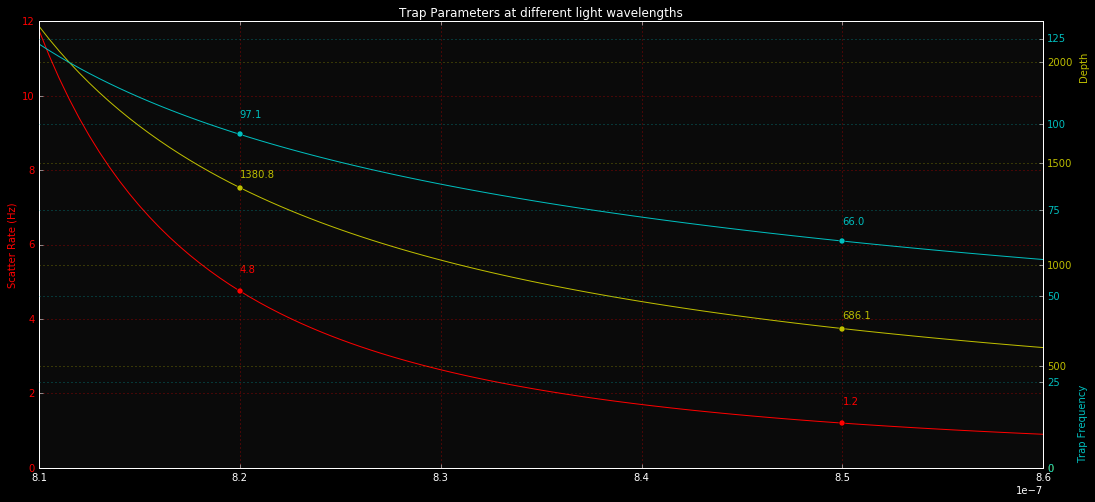

In [121]:
import numpy as np
# in hertz
desiredTrapFrequency = 75*10**3
# waist is in meters
trapWaist = 170*10**(-6)
h = 6.626*10**-34
# (in meters) This is different from the wavelength because of the bowtie configuration.
powerEstimate = 1.4*0.8*0.8*0.9*0.9
lightWavelengths = np.linspace(810*10**-9, 860*10**-9, 101)
latticeWavelengths = np.sqrt(2) * lightWavelengths
trapFrequencies = trapFrequency(powerEstimate, trapWaist, lightWavelengths, latticeWavelengths)
depths = trapDepth(powerEstimate, trapWaist, lightWavelengths)
scatterRates = scatterRate(powerEstimate, trapWaist, lightWavelengths)
index850 = np.where(lightWavelengths==850*10**-9)[0][0]
index820 = np.where(lightWavelengths==820*10**-9)[0][0]
print(index820)
print('hi')
fig, ax1 = plt.subplots()
plt.plot(lightWavelengths, scatterRates, 'r', marker='o', markevery=[index850, index820])
ax1.set_ylabel('Scatter Rate (Hz)', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('r')
ax1.grid(color='r')
ax1.annotate("{:.1f}".format(scatterRates[index850]),
             xy=(lightWavelengths[index850], scatterRates[index850]+0.5), color='r')
ax1.annotate("{:.1f}".format(scatterRates[index820]),
             xy=(lightWavelengths[index820], scatterRates[index820]+0.5), color='r')
# second plot
ax2 = ax1.twinx()
plt.plot(lightWavelengths, depths*10**-3/h, 'y', marker='o', markevery=[index850, index820])
ax2.set_ylabel('Depth', color='y')
for tl in ax2.get_yticklabels():
    tl.set_color('y')
ax2.set_yticks(np.arange(0,2200,500))
ax2.grid(color='y')
ax2.set_ylim(0,2200)
ax2.yaxis.set_label_coords(1.035, 0.9)
ax2.annotate("{:.1f}".format(depths[index850]*10**-3/h),
             xy=(lightWavelengths[index850], depths[index850]*10**-3/h+50), color='y')
ax2.annotate("{:.1f}".format(depths[index820]*10**-3/h),
             xy=(lightWavelengths[index820], depths[index820]*10**-3/h+50), color='y')
# third
ax3 = ax1.twinx()
plt.plot(lightWavelengths, trapFrequencies*10**-3, 'c', marker='o', markevery=[index850, index820])
ax3.set_ylabel('Trap Frequency', color='c')
for tl in ax3.get_yticklabels():
    tl.set_color('c')
ax3.set_yticks(np.arange(0,130,25))
ax3.grid(color='c')
ax3.set_ylim(0,130)
ax3.yaxis.set_label_coords(1.035, 0.1)
ax3.annotate("{:.1f}".format(trapFrequencies[index850]*10**-3),
             xy=(lightWavelengths[index850], trapFrequencies[index850]*10**-3+5), color='c')
ax3.annotate("{:.1f}".format(trapFrequencies[index820]*10**-3),
             xy=(lightWavelengths[index820], trapFrequencies[index820]*10**-3+5), color='c')

ax3.set_xlim(810*10**-9, 860*10**-9)
plt.title('Trap Parameters at different light wavelengths')
plt.show();